In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
x = pd.read_csv("data/0_x.csv", header = None)
y = pd.read_csv("data/0_y.csv", header = None)
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


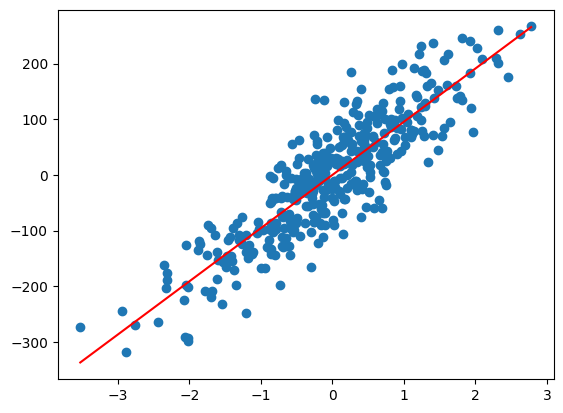

In [ ]:
binary = LinearRegression()
binary.fit(x[[1]], y)
y_pred = binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [13]:
r2_score(y_pred=y_pred, y_true=y)

0.7699743283650629

Множественная регрессия

In [14]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

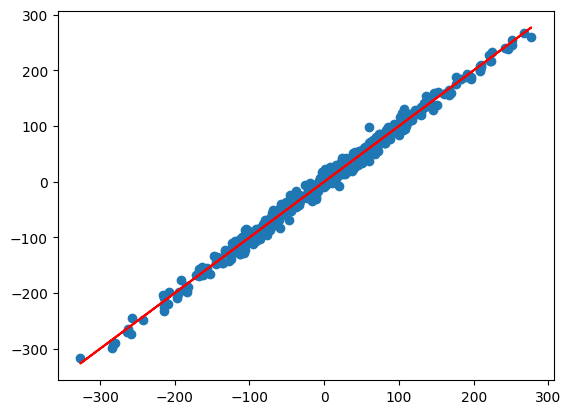

In [15]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')